In [1]:
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt

/home/grmc1999/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
def replace_err(data):
    return np.concatenate((data[:2],np.array(['c'+data[2][9:]])),axis=0)
v_replace_err=np.vectorize(replace_err,signature="(n)->(m)")
def no_spaces(data):
    f=np.array(data[0].split(" ")[1:]+data[1].split(" ")[1:])
    return np.array([f])
v_no_spaces=np.vectorize(pyfunc=no_spaces,signature="(m)->(k)")

In [3]:
#[x, y, w, h]
#Lectura de informacion
f1=open("/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/validcrop.txt","r")
lines=f1.readlines()

In [4]:
#Complete pipeline
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4)

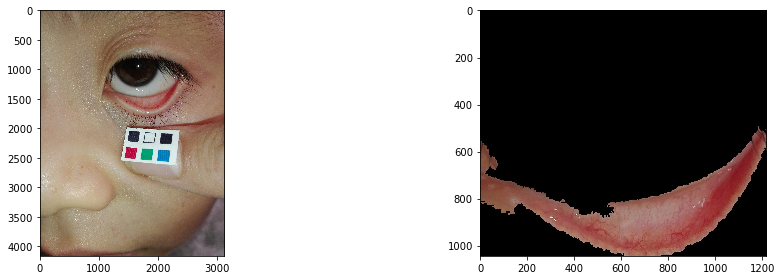

In [5]:
name='c1anemia-300.jpg'
di='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Imagenes_Originales/'+name
ROI='/home/grmc1999/Documentos/LIIARPI/hmg/Base_de_Datos/Sem_Auto/eye_'+name
img = io.imread(di)
ROI = io.imread(ROI)

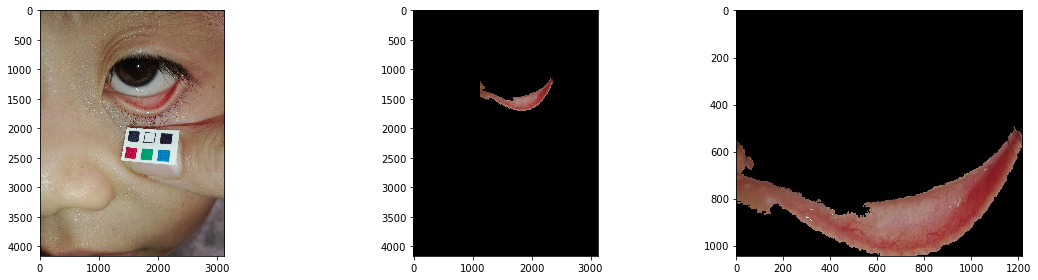

In [24]:
#print(xywh[np.where(imgnames==name)])
#marco=xywh[np.where(imgnames==name)].astype(int)[0]+1
#print(marco)
#print(ROI.shape)
#mask=np.full((img.shape),0)
#print(mask.shape)
#print(ROI.shape)
#print(mask[marco[1]:(marco[1]+marco[3]),marco[0]:(marco[0]+marco[2]),:].shape)
#mask[marco[1]:(marco[1]+marco[3]),marco[0]:(marco[0]+marco[2]),:]=ROI

def assemble_mask(xywh,imgnames,name):
    marco=xywh[np.where(imgnames==name)].astype(int)[0]+1
    mask=np.full((img.shape),0)
    mask[marco[1]:(marco[1]+marco[3]),marco[0]:(marco[0]+marco[2]),:]=ROI
    return mask
mask=assemble_mask(xywh,imgnames,name)
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3, figsize=(16, 4))
ax0.imshow(img)
ax1.imshow(mask)
ax2.imshow(ROI)
plt.tight_layout()
plt.show()